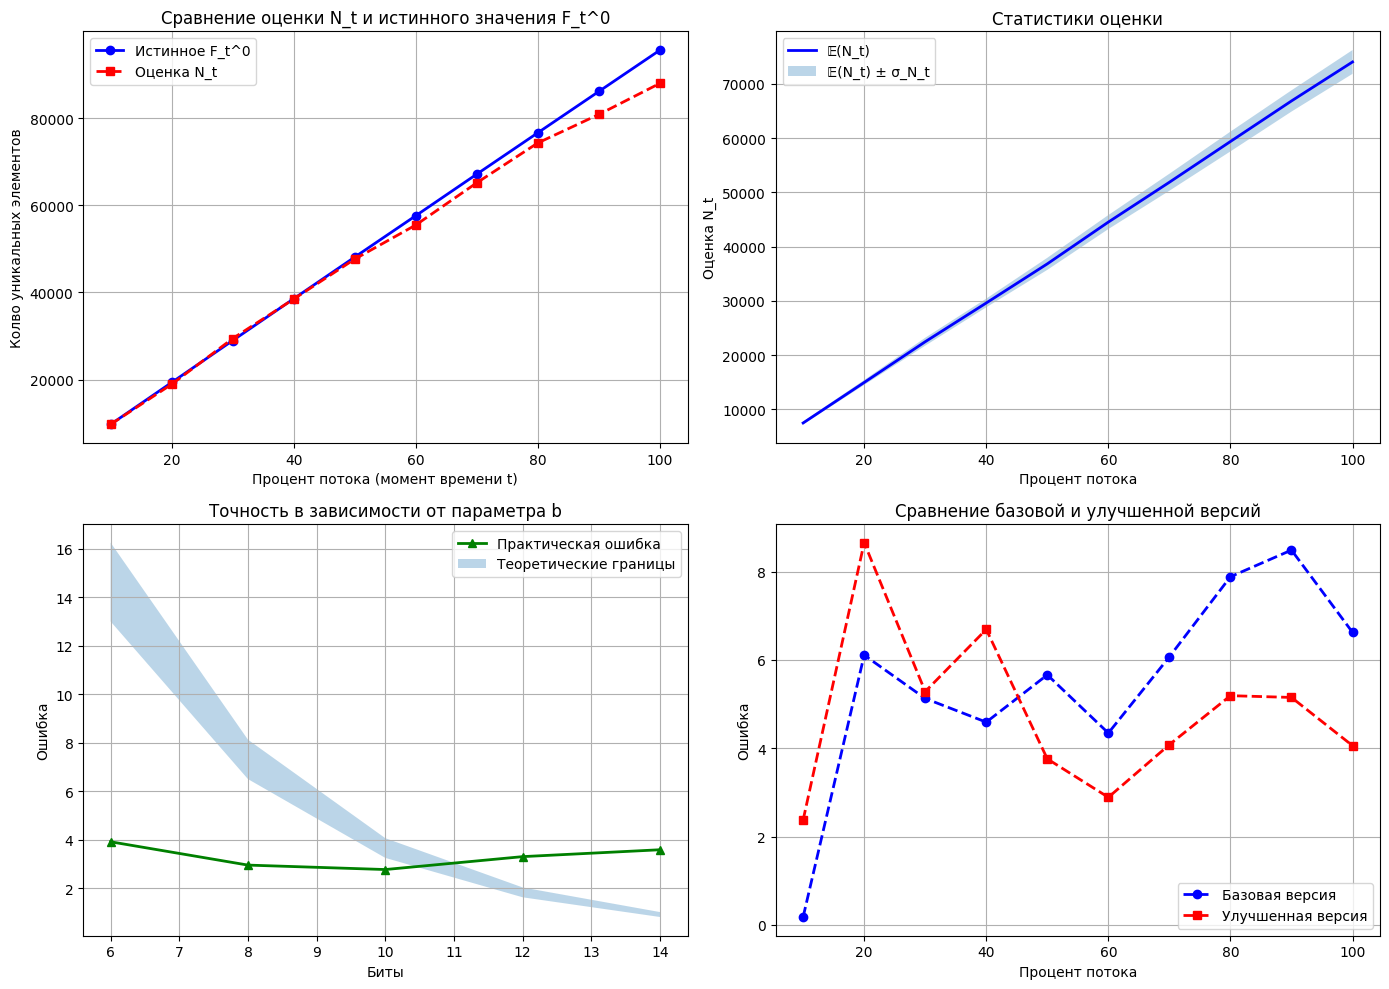

Средняя ошибка: 2.87%
Максимальная ошибка: 7.98%
Минимальная ошибка: 0.01%
Стандартное отклонение: 2.42%
Среднее стандартное отклонение: 1218.89
Относительное отклонение: 2.99%
Теоретические границы для b=10:
1.04/√m = 3.25%
1.30/√m = 4.06%
Практическая ошибка: 2.87%


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

accuracy_data = """процент,точное_число,оценка,ошибка_процентов
10,9700,9701.26,0.0129679
20,19319,18910.8,2.11315
30,28951,29410.7,1.5879
40,38548,38478.1,0.18131
50,48111,47644.1,0.97049
60,57608,55474.6,3.70324
70,67153,65165.4,2.95978
80,76651,74313.8,3.04911
90,86139,80852.8,6.13681
100,95620,87993.3,7.97605"""

statistics_data = """процент,среднее_Nt,стандартное_отклонение,среднее-отклонение,среднее+отклонение
10,7493.81,259.872,7233.94,7753.68
20,14958.6,454.725,14503.9,15413.4
30,22470.9,729.768,21741.2,23200.7
40,29614.6,799.725,28814.9,30414.4
50,36826.7,1110.55,35716.1,37937.2
60,44526.6,1291.99,43234.6,45818.6
70,51869.6,1566.66,50303,53436.3
80,59378.3,1821.97,57556.3,61200.2
90,66853.3,1960.53,64892.8,68813.8
100,74042.9,2193.07,71849.8,76235.9"""

bits_data = """биты,средняя_ошибка,память_байт,теор_нижняя_граница,теор_верхняя_граница
6,3.91462,64,13,16.25
8,2.95314,256,6.5,8.125
10,2.77002,1024,3.25,4.0625
12,3.30247,4096,1.625,2.03125
14,3.58608,16384,0.8125,1.01562"""

comparison_data = """процент,точное,базовая_оценка,улучшенная_оценка,ошибка_базовой,ошибка_улучшенной,память_базовой,память_улучшенной
10,7777,7791.03,7592.25,0.180423,2.37564,1024,1024
20,15466,14521.1,14127.3,6.10963,8.65556,1024,1024
30,23185,21995.9,21959.8,5.12859,5.28441,1024,1024
40,30876,29458.1,28809.9,4.59211,6.69176,1024,1024
50,38548,36365.2,37098.4,5.66262,3.76041,1024,1024
60,46214,44206,44878.2,4.34509,2.89042,1024,1024
70,53815,50547.7,51617.7,6.07141,4.08303,1024,1024
80,61423,56580.2,58234.3,7.88427,5.19138,1024,1024
90,69067,63205,65509,8.4874,5.15148,1024,1024
100,76651,71572.6,73539.2,6.62541,4.05969,1024,1024"""

def parse_data(data_str):
    lines = data_str.strip().split('\n')
    header = lines[0].split(',')
    rows = [line.split(',') for line in lines[1:]]
    return header, rows

_, acc_rows = parse_data(accuracy_data)
percent = [int(row[0]) for row in acc_rows]
true_vals = [int(row[1]) for row in acc_rows]
est_vals = [float(row[2]) for row in acc_rows]
errors = [float(row[3]) for row in acc_rows]

_, stat_rows = parse_data(statistics_data)
mean_vals = [float(row[1]) for row in stat_rows]
std_vals = [float(row[2]) for row in stat_rows]
lower_vals = [float(row[3]) for row in stat_rows]
upper_vals = [float(row[4]) for row in stat_rows]

_, bits_rows = parse_data(bits_data)
bits_vals = [int(row[0]) for row in bits_rows]
avg_errs = [float(row[1]) for row in bits_rows]
mem_vals = [int(row[2]) for row in bits_rows]
theoretical_low = [float(row[3]) for row in bits_rows]
theoretical_high = [float(row[4]) for row in bits_rows]

_, comp_rows = parse_data(comparison_data)
comp_percent = [int(row[0]) for row in comp_rows]
true_counts = [int(row[1]) for row in comp_rows]
basic_ests = [float(row[2]) for row in comp_rows]
plus_ests = [float(row[3]) for row in comp_rows]
basic_errs = [float(row[4]) for row in comp_rows]
plus_errs = [float(row[5]) for row in comp_rows]
basic_mem = [int(row[6]) for row in comp_rows]
plus_mem = [int(row[7]) for row in comp_rows]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].plot(percent, true_vals, 'b-o', linewidth=2, label='Истинное F_t^0')
axes[0,0].plot(percent, est_vals, 'r--s', linewidth=2, label='Оценка N_t')
axes[0,0].set_xlabel('Процент потока (момент времени t)')
axes[0,0].set_ylabel('Колво уникальных элементов')
axes[0,0].set_title('Сравнение оценки N_t и истинного значения F_t^0')
axes[0,0].legend()
axes[0,0].grid(True)

axes[0,1].plot(percent, mean_vals, 'b-', linewidth=2, label='𝔼(N_t)')
axes[0,1].fill_between(percent, lower_vals, upper_vals, alpha=0.3, label='𝔼(N_t) ± σ_N_t')
axes[0,1].set_xlabel('Процент потока')
axes[0,1].set_ylabel('Оценка N_t')
axes[0,1].set_title('Статистики оценки')
axes[0,1].legend()
axes[0,1].grid(True)

axes[1,0].plot(bits_vals, avg_errs, 'g-^', linewidth=2, label='Практическая ошибка')
axes[1,0].fill_between(bits_vals, theoretical_low, theoretical_high, alpha=0.3, label='Теоретические границы')
axes[1,0].set_xlabel('Биты')
axes[1,0].set_ylabel('Ошибка')
axes[1,0].set_title('Точность в зависимости от параметра b')
axes[1,0].legend()
axes[1,0].grid(True)

axes[1,1].plot(comp_percent, basic_errs, 'b--o', linewidth=2, label='Базовая версия')
axes[1,1].plot(comp_percent, plus_errs, 'r--s', linewidth=2, label='Улучшенная версия')
axes[1,1].set_xlabel('Процент потока')
axes[1,1].set_ylabel('Ошибка')
axes[1,1].set_title('Сравнение базовой и улучшенной версий')
axes[1,1].legend()
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

print(f"Средняя ошибка: {np.mean(errors):.2f}%")
print(f"Максимальная ошибка: {np.max(errors):.2f}%")
print(f"Минимальная ошибка: {np.min(errors):.2f}%")
print(f"Стандартное отклонение: {np.std(errors):.2f}%")
print(f"Среднее стандартное отклонение: {np.mean(std_vals):.2f}")
print(f"Относительное отклонение: {np.mean(std_vals) / np.mean(mean_vals) * 100:.2f}%")
print("Теоретические границы для b=10:")
print(f"1.04/√m = {1.04 / (1024**0.5) * 100:.2f}%")
print(f"1.30/√m = {1.30 / (1024**0.5) * 100:.2f}%")
print(f"Практическая ошибка: {np.mean(errors):.2f}%")
